In [19]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

In [115]:
result = pd.read_csv('./data/df_predict.csv').iloc[:,1:].sort_values('frame_name').reset_index(drop=True)
result

,frame_name,lp_cat,lp_all,lp_ratio,lp_cat_canny,lp_all_canny,lp_ratio_canny,blur,cat_x,cat_y,face_size,size_ratio,eyes,ears,nose,img_ctr,num_eye,num_ear,num_nose,eye_x1,eye_y1,eye_x2,eye_y2,eye_w1,eye_w2,eye_w,eye_h1,eye_h2,eye_h,eye_size,eye_ratio,nose_x,nose_y,ear_w1,ear_w2,ear_w,ear_h1,ear_h2,ear_h,video,avg_face,nose_to_ctr,avg_to_ctr,prob
0,IMG_0395.MOV_11.jpg,1.886157,58.200515,0.032408,40128.709087,18828.055094,2.131325,0,0.546875,0.193519,128881.000000,0.062153,"[(1102, 306, 102, 75), (1273, 318, 118, 72)]","[[1010, 41, 175, 182], [1354, 38, 202, 198]]","[[1178, 434, 94, 60]]","(960.0, 540.0)",2,2,1,1102,306,1273,318,102,118,110.0,75,72,73.5,8085.00,0.062732,1178,434,175,202,188.5,182,198,190.0,IMG_0395,253424.287037,242.404620,354.444951,0.525
1,IMG_0395.MOV_14.jpg,1.958144,40.783653,0.048013,14070.580862,13296.257781,1.058236,0,0.545833,0.175000,148225.000000,0.071482,"[(1112, 299, 100, 82), (1278, 319, 113, 71)]","[[1018, 36, 171, 183], [1367, 33, 197, 202]]","[[1186, 429, 88, 60]]","(960.0, 540.0)",2,2,1,1112,299,1278,319,100,113,106.5,82,71,76.5,8147.25,0.054965,1186,429,171,197,184.0,183,202,192.5,IMG_0395,253424.287037,251.787609,354.444951,0.450
2,IMG_0395.MOV_140.jpg,0.622981,38.946426,0.015996,0.000000,9230.690060,0.000000,1,0.661458,0.384259,253424.287037,0.001622,"[(1087, 411, 86, 72)]","[[976, 1, 209, 230], [1361, 58, 203, 233]]",[],"(960.0, 540.0)",1,2,0,1087,411,0,0,86,0,86.0,72,0,72.0,6192.00,1.840666,0,0,209,203,206.0,230,233,231.5,IMG_0395,253424.287037,1101.453585,354.444951,0.260
3,IMG_0395.MOV_147.jpg,1.624362,18.740041,0.086679,18121.169637,2623.609481,6.906961,0,0.575000,0.282407,106276.000000,0.051252,"[(1122, 391, 111, 76), (1306, 403, 87, 80)]","[[967, -4, 203, 224], [1348, 3, 193, 217]]","[[1226, 527, 82, 54]]","(960.0, 540.0)",2,2,1,1122,391,1306,403,111,87,99.0,76,80,78.0,7722.00,0.072660,1226,527,203,193,198.0,224,217,220.5,IMG_0395,253424.287037,266.317480,354.444951,0.260
4,IMG_0395.MOV_150.jpg,1.410413,15.226744,0.092627,1661.567337,2551.767143,0.651144,0,0.558333,0.269444,113569.000000,0.054769,"[(1104, 390, 101, 70)]","[[937, -4, 216, 221], [1335, 3, 199, 220]]","[[1199, 521, 75, 56]]","(960.0, 540.0)",1,2,1,1104,390,0,0,101,0,101.0,70,0,70.0,7070.00,0.062253,1199,521,216,199,207.5,221,220,220.5,IMG_0395,253424.287037,239.754041,354.444951,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,IMG_0395.MOV_81.jpg,1.786110,25.883650,0.069005,7142.027261,6071.790868,1.176264,0,0.489063,0.455556,157609.000000,0.076007,"[(1008, 620, 98, 70), (1174, 626, 97, 70)]","[[1293, 274, 137, 188], [876, 323, 177, 175]]","[[1099, 749, 82, 55]]","(960.0, 540.0)",2,2,1,1008,620,1174,626,98,97,97.5,70,70,70.0,6825.00,0.043303,1099,749,137,177,157.0,188,175,181.5,IMG_0395,253424.287037,251.001992,354.444951,0.410
104,IMG_0395.MOV_84.jpg,1.363292,17.575523,0.077568,974.124035,4083.034393,0.238578,0,0.504687,0.441667,131769.000000,0.063546,"[(1030, 592, 92, 75), (1197, 611, 62, 73)]","[[913, 293, 182, 176], [1269, 346, 157, 155]]","[[1114, 719, 85, 61]]","(960.0, 540.0)",2,2,1,1030,592,1197,611,92,62,77.0,75,73,74.0,5698.00,0.043242,1114,719,182,157,169.5,176,155,165.5,IMG_0395,253424.287037,236.129202,354.444951,0.235
105,IMG_0395.MOV_87.jpg,1.489114,26.763353,0.055640,7502.551016,8431.800394,0.889792,0,0.509896,0.425000,127449.000000,0.061463,"[(1037, 564, 89, 67), (1200, 582, 85, 72)]","[[910, 262, 192, 185], [1284, 292, 190, 174]]","[[1125, 694, 83, 54]]","(960.0, 540.0)",2,2,1,1037,564,1200,582,89,85,87.0,67,72,69.5,6046.50,0.047443,1125,694,192,190,191.0,185,174,179.5,IMG_0395,253424.287037,225.701130,354.444951,0.265
106,IMG_0395.MOV_90.jpg,1.631516,26.232415,0.062195,22500.857577,7800.773521,2.884439,0,0.513021,0.410185,129600.000000,0.062500,"[(1040, 553, 99, 70), (1211, 575, 75, 66)]","[[928, 236, 170, 195], [1283, 259, 198, 191]]","[[1130, 679, 78, 57]]","(960.0

In [117]:
result['face_frame_ctr'] = abs(result['cat_x']-0.5)+abs(result['cat_y']-0.5)
result['face_frame_ctr'] = abs((result['eye_x1']+result['eye_x2'])/2 - 0.5) +\
                           abs(((result['eye_y1']+result['eye_y2'])/2+result['nose_y'])/2 - 0.5)

# df['face_frame_ctr'] = abs((df['eye_x1']+df['eye_x2'])/2 - 0.5) +\
#                            abs(((df['eye_y1']+df['eye_y2'])/2+df['nose_y'])/2 - 0.5)

result.sort_values(['lp_cat_canny','face_frame_ctr'],ascending=[False,True])

,frame_name,lp_cat,lp_all,lp_ratio,lp_cat_canny,lp_all_canny,lp_ratio_canny,blur,cat_x,cat_y,face_size,size_ratio,eyes,ears,nose,img_ctr,num_eye,num_ear,num_nose,eye_x1,eye_y1,eye_x2,eye_y2,eye_w1,eye_w2,eye_w,eye_h1,eye_h2,eye_h,eye_size,eye_ratio,nose_x,nose_y,ear_w1,ear_w2,ear_w,ear_h1,ear_h2,ear_h,video,avg_face,nose_to_ctr,avg_to_ctr,prob,face_frame_ctr
76,IMG_0395.MOV_582.jpg,6.212680,42.313566,0.146825,54439.656973,8657.048936,6.288477,0,0.399479,0.168519,235225.000000,0.113438,"[(836, 339, 127, 74), (1063, 353, 154, 78)]","[[697, 35, 205, 248], [1165, 72, 250, 259]]","[[951, 451, 98, 73]]","(960.0, 540.0)",2,2,1,836,339,1063,353,127,154,140.5,74,78,76.0,10678.00,0.045395,951,451,205,250,227.5,248,259,253.5,IMG_0395,253424.287037,89.453899,354.444951,0.500,1347.00
74,IMG_0395.MOV_574.jpg,5.950590,46.730848,0.127338,48865.019286,9676.858936,5.049678,0,0.406771,0.115741,235225.000000,0.113438,"[(842, 280, 129, 98), (1087, 286, 139, 108)]","[[698, 1, 214, 238], [1184, -7, 256, 314]]","[[965, 404, 102, 86]]","(960.0, 540.0)",2,2,1,842,280,1087,286,129,139,134.0,98,108,103.0,13802.00,0.058676,965,404,214,256,235.0,238,314,276.0,IMG_0395,253424.287037,136.091881,354.444951,0.550,1307.00
80,IMG_0395.MOV_599.jpg,5.760295,53.666297,0.107335,43262.436700,12715.341382,3.402381,0,0.391146,0.282407,251001.000000,0.121046,"[(805, 465, 143, 107), (1060, 491, 126, 73)]","[[694, 127, 298, 233], [1148, 148, 258, 274]]","[[935, 626, 104, 72]]","(960.0, 540.0)",2,2,1,805,465,1060,491,143,126,134.5,107,73,90.0,12105.00,0.048227,935,626,298,258,278.0,233,274,253.5,IMG_0395,253424.287037,89.560036,354.444951,0.625,1483.50
58,IMG_0395.MOV_527.jpg,4.717066,54.174000,0.087073,41607.843832,13144.451212,3.165430,0,0.440104,0.072222,290521.000000,0.140105,"[(941, 230, 138, 116), (1196, 237, 141, 113)]","[[821, -4, 212, 221], [1313, -8, 251, 277]]","[[1049, 386, 112, 85]]","(960.0, 540.0)",2,2,1,941,230,1196,237,138,141,139.5,116,113,114.5,15972.75,0.054980,1049,386,212,251,231.5,221,277,249.0,IMG_0395,253424.287037,177.867929,354.444951,0.650,1377.25
0,IMG_0395.MOV_11.jpg,1.886157,58.200515,0.032408,40128.709087,18828.055094,2.131325,0,0.546875,0.193519,128881.000000,0.062153,"[(1102, 306, 102, 75), (1273, 318, 118, 72)]","[[1010, 41, 175, 182], [1354, 38, 202, 198]]","[[1178, 434, 94, 60]]","(960.0, 540.0)",2,2,1,1102,306,1273,318,102,118,110.0,75,72,73.5,8085.00,0.062732,1178,434,175,202,188.5,182,198,190.0,IMG_0395,253424.287037,242.404620,354.444951,0.525,1559.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,IMG_0395.MOV_63.jpg,1.147069,5.997136,0.191269,0.000000,92.883898,0.000000,0,0.430208,0.208333,146689.000000,0.070741,[],"[[801, 25, 214, 231], [1209, 56, 171, 162]]",[],"(960.0, 540.0)",0,2,0,0,0,0,0,0,0,0.0,0,0,0.0,0.00,0.000000,0,0,214,171,192.5,231,162,196.5,IMG_0395,253424.287037,1101.453585,354.444951,0.180,1.00
99,IMG_0395.MOV_72.jpg,1.187279,5.769923,0.205770,0.000000,52.243273,0.000000,0,0.426042,0.179630,177241.000000,0.085475,[],"[[767, 9, 181, 181], [1152, 18, 188, 173]]",[],"(960.0, 540.0)",0,2,0,0,0,0,0,0,0,0.0,0,0,0.0,0.00,0.000000,0,0,181,188,184.5,181,173,177.0,IMG_0395,253424.287037,1101.453585,354.444951,0.150,1.00
100,IMG_0395.MOV_75.jpg,1.174803,7.281273,0.161346,0.000000,74.445095,0.000000,0,0.454688,0.341667,128164.000000,0.061807,[],"[[804, 186, 176, 171], [1218, 182, 146, 166]]",[],"(960.0, 540.0)",0,2,0,0,0,0,0,0,0,0.0,0,0,0.0,0.00,0.000000,0,0,176,146,161.0,171,166,168.5,IMG_0395,253424.287037,1101.453585,354.444951,0.125,1.00
22,IMG_0395.MOV_368.jpg,1.576232,7.546179,0.208878,0.000000,10.285590,0.000000,0,0.447396,0.123148,351649.000000,0.169584,"[(889, 330, 220, 153)]","[[788, -10, 268, 140], [1346, 0, 320, 135]]",[],"(960.0, 540.0)",1,2,0,889,330,0,0,220,0,220.0,153,0,153.0,33660.00,0.095720,0,0,268,320,294.0,140,135,137.5,IMG_0395,253424.287037,1101.453585,354.444951,0.26

<AxesSubplot:>

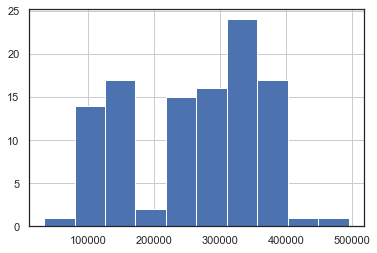

In [232]:
result.face_size.hist()

In [235]:
max(result.face_size),min(result.face_size),(max(result.face_size)-min(result.face_size))/3

(494209.0, 33489.0, 153573.33333333334)

In [240]:
MAX = max(result.face_size)
MIN = min(result.face_size)
section = (max(result.face_size)-min(result.face_size))//3
['small' for x in result.face_size.tolist() if x<MIN+section ]

FACE_SIZE = []
for x in result.face_size.tolist():
    if x<MIN+section:
        FACE_SIZE.append('small')
    elif MIN+section < x < MIN + 2*section:
        FACE_SIZE.append('medium')
    else:
        FACE_SIZE.append('large')

result['FACE_SIZE'] = FACE_SIZE

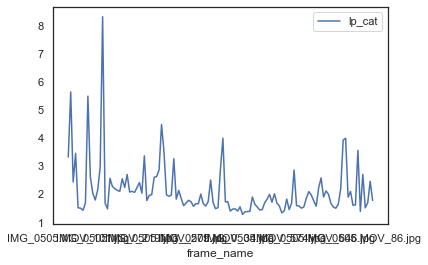

In [39]:
result.plot('frame_name','lp_cat');

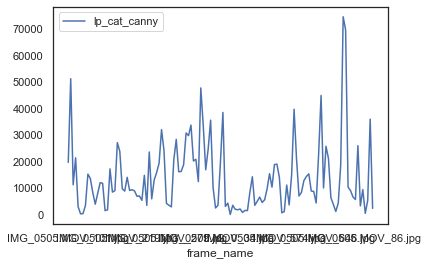

In [40]:
result.plot('frame_name','lp_cat_canny');

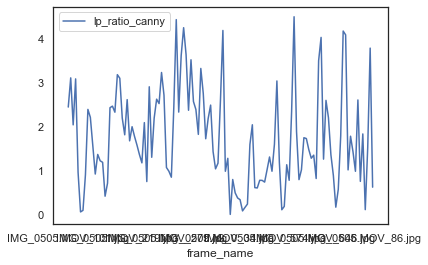

In [41]:
result.plot('frame_name','lp_ratio_canny');

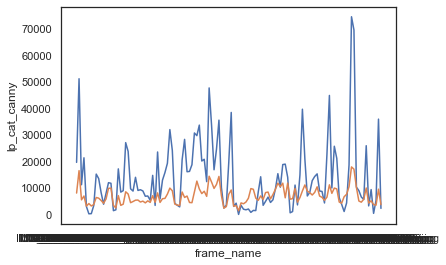

In [42]:
fig,ax = plt.subplots()
sns.lineplot(x='frame_name',y='lp_cat_canny',data=result);
sns.lineplot(x='frame_name',y='lp_all_canny',data=result);
# sns.lineplot(x='frame_name',y='lp_ratio',data=result);
# sns.lineplot(x='frame_name',y='lp_ratio_canny',data=result);

In [66]:
import altair as alt
from vega_datasets import data

source = data.wheat()

alt.Chart(source).mark_trail().encode(
    x='year:T',
    y='wheat:Q',
    size='wheat:Q'
)

alt.Chart(...)

In [68]:
source.head()

,year,wheat,wages
0,1565,41.0,5.00
1,1570,45.0,5.05
2,1575,42.0,5.08
3,1580,49.0,5.12
4,1585,41.5,5.15


In [83]:
source = result

lp_cat = alt.Chart(source).mark_trail().encode(
    x='frame_num:T',
    y='lp_cat:Q',
    size='lp_cat:Q'
)

lp_all = alt.Chart(source).mark_trail().encode(
    x='frame_num:T',
    y='lp_all:Q',
    size='lp_all:Q'
)

lp_cat + lp_all

alt.LayerChart(...)

In [71]:
# result.frame_name

In [87]:
base = alt.Chart(result.reset_index()).encode(x='frame_num')

alt.layer(
    base.mark_line(color='blue').encode(y='lp_cat_canny'),
    base.mark_line(color='red').encode(y='lp_all_canny')
)

alt.LayerChart(...)

In [92]:
result_melt = result[['frame_num','lp_cat_canny','lp_all_canny']].reset_index(drop=True).melt('frame_num')
alt.Chart(result_melt).mark_line().encode(
    x='frame_num',
    y='value',
    color='variable'
)

alt.Chart(...)

In [110]:
import altair as alt
from vega_datasets import data

source = data.stocks()

alt.Chart(source).mark_line().encode(
    x='date',
    y='price',
    color='symbol',
    strokeDash='symbol',
#     tooltip=['a','b','c']
)

alt.Chart(...)

In [81]:
source.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


In [76]:
result['frame_num'] = result.index

In [137]:
result['EYE_count']=[str(x) for x in result.num_eye.tolist()]

In [146]:
['data/'+ x for x in result.frame_name.tolist()]

['data/IMG_0395.MOV_11.jpg',
 'data/IMG_0395.MOV_14.jpg',
 'data/IMG_0395.MOV_140.jpg',
 'data/IMG_0395.MOV_147.jpg',
 'data/IMG_0395.MOV_150.jpg',
 'data/IMG_0395.MOV_157.jpg',
 'data/IMG_0395.MOV_160.jpg',
 'data/IMG_0395.MOV_163.jpg',
 'data/IMG_0395.MOV_167.jpg',
 'data/IMG_0395.MOV_17.jpg',
 'data/IMG_0395.MOV_170.jpg',
 'data/IMG_0395.MOV_185.jpg',
 'data/IMG_0395.MOV_189.jpg',
 'data/IMG_0395.MOV_199.jpg',
 'data/IMG_0395.MOV_2.jpg',
 'data/IMG_0395.MOV_20.jpg',
 'data/IMG_0395.MOV_213.jpg',
 'data/IMG_0395.MOV_225.jpg',
 'data/IMG_0395.MOV_229.jpg',
 'data/IMG_0395.MOV_233.jpg',
 'data/IMG_0395.MOV_240.jpg',
 'data/IMG_0395.MOV_365.jpg',
 'data/IMG_0395.MOV_368.jpg',
 'data/IMG_0395.MOV_395.jpg',
 'data/IMG_0395.MOV_406.jpg',
 'data/IMG_0395.MOV_411.jpg',
 'data/IMG_0395.MOV_414.jpg',
 'data/IMG_0395.MOV_417.jpg',
 'data/IMG_0395.MOV_420.jpg',
 'data/IMG_0395.MOV_423.jpg',
 'data/IMG_0395.MOV_426.jpg',
 'data/IMG_0395.MOV_429.jpg',
 'data/IMG_0395.MOV_432.jpg',
 'data/IMG_0395.

In [139]:
result

,frame_name,lp_cat,lp_all,lp_ratio,lp_cat_canny,lp_all_canny,lp_ratio_canny,blur,cat_x,cat_y,face_size,size_ratio,eyes,ears,nose,img_ctr,num_eye,num_ear,num_nose,eye_x1,eye_y1,eye_x2,eye_y2,eye_w1,eye_w2,eye_w,eye_h1,eye_h2,eye_h,eye_size,eye_ratio,nose_x,nose_y,ear_w1,ear_w2,ear_w,ear_h1,ear_h2,ear_h,video,avg_face,nose_to_ctr,avg_to_ctr,prob,face_frame_ctr,EYE_count
0,IMG_0395.MOV_11.jpg,1.886157,58.200515,0.032408,40128.709087,18828.055094,2.131325,0,0.546875,0.193519,128881.000000,0.062153,"[(1102, 306, 102, 75), (1273, 318, 118, 72)]","[[1010, 41, 175, 182], [1354, 38, 202, 198]]","[[1178, 434, 94, 60]]","(960.0, 540.0)",2,2,1,1102,306,1273,318,102,118,110.0,75,72,73.5,8085.00,0.062732,1178,434,175,202,188.5,182,198,190.0,IMG_0395,253424.287037,242.404620,354.444951,0.525,1559.50,2
1,IMG_0395.MOV_14.jpg,1.958144,40.783653,0.048013,14070.580862,13296.257781,1.058236,0,0.545833,0.175000,148225.000000,0.071482,"[(1112, 299, 100, 82), (1278, 319, 113, 71)]","[[1018, 36, 171, 183], [1367, 33, 197, 202]]","[[1186, 429, 88, 60]]","(960.0, 540.0)",2,2,1,1112,299,1278,319,100,113,106.5,82,71,76.5,8147.25,0.054965,1186,429,171,197,184.0,183,202,192.5,IMG_0395,253424.287037,251.787609,354.444951,0.450,1563.00,2
2,IMG_0395.MOV_140.jpg,0.622981,38.946426,0.015996,0.000000,9230.690060,0.000000,1,0.661458,0.384259,253424.287037,0.001622,"[(1087, 411, 86, 72)]","[[976, 1, 209, 230], [1361, 58, 203, 233]]",[],"(960.0, 540.0)",1,2,0,1087,411,0,0,86,0,86.0,72,0,72.0,6192.00,1.840666,0,0,209,203,206.0,230,233,231.5,IMG_0395,253424.287037,1101.453585,354.444951,0.260,645.25,1
3,IMG_0395.MOV_147.jpg,1.624362,18.740041,0.086679,18121.169637,2623.609481,6.906961,0,0.575000,0.282407,106276.000000,0.051252,"[(1122, 391, 111, 76), (1306, 403, 87, 80)]","[[967, -4, 203, 224], [1348, 3, 193, 217]]","[[1226, 527, 82, 54]]","(960.0, 540.0)",2,2,1,1122,391,1306,403,111,87,99.0,76,80,78.0,7722.00,0.072660,1226,527,203,193,198.0,224,217,220.5,IMG_0395,253424.287037,266.317480,354.444951,0.260,1675.00,2
4,IMG_0395.MOV_150.jpg,1.410413,15.226744,0.092627,1661.567337,2551.767143,0.651144,0,0.558333,0.269444,113569.000000,0.054769,"[(1104, 390, 101, 70)]","[[937, -4, 216, 221], [1335, 3, 199, 220]]","[[1199, 521, 75, 56]]","(960.0, 540.0)",1,2,1,1104,390,0,0,101,0,101.0,70,0,70.0,7070.00,0.062253,1199,521,216,199,207.5,221,220,220.5,IMG_0395,253424.287037,239.754041,354.444951,0.250,909.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,IMG_0395.MOV_81.jpg,1.786110,25.883650,0.069005,7142.027261,6071.790868,1.176264,0,0.489063,0.455556,157609.000000,0.076007,"[(1008, 620, 98, 70), (1174, 626, 97, 70)]","[[1293, 274, 137, 188], [876, 323, 177, 175]]","[[1099, 749, 82, 55]]","(960.0, 540.0)",2,2,1,1008,620,1174,626,98,97,97.5,70,70,70.0,6825.00,0.043303,1099,749,137,177,157.0,188,175,181.5,IMG_0395,253424.287037,251.001992,354.444951,0.410,1776.00,2
104,IMG_0395.MOV_84.jpg,1.363292,17.575523,0.077568,974.124035,4083.034393,0.238578,0,0.504687,0.441667,131769.000000,0.063546,"[(1030, 592, 92, 75), (1197, 611, 62, 73)]","[[913, 293, 182, 176], [1269, 346, 157, 155]]","[[1114, 719, 85, 61]]","(960.0, 540.0)",2,2,1,1030,592,1197,611,92,62,77.0,75,73,74.0,5698.00,0.043242,1114,719,182,157,169.5,176,155,165.5,IMG_0395,253424.287037,236.129202,354.444951,0.235,1772.75,2
105,IMG_0395.MOV_87.jpg,1.489114,26.763353,0.055640,7502.551016,8431.800394,0.889792,0,0.509896,0.425000,127449.000000,0.061463,"[(1037, 564, 89, 67), (1200, 582, 85, 72)]","[[910, 262, 192, 185], [1284, 292, 190, 174]]","[[1125, 694, 83, 54]]","(960.0, 540.0)",2,2,1,1037,564,1200,582,89,85,87.0,67,72,69.5,6046.50,0.047443,1125,694,192,190,191.0,185,174,179.5,IMG_0395,253424.287037,225.701130,354.444951,0.265,1751.00,2
106,IMG_0395.MOV_90.jpg,1.631516,26.232415,0.062195,22500.857577,7800.773521,2.884439,0,0.513021,0.410185,129600.000000,0.062500,"[(1040, 553,

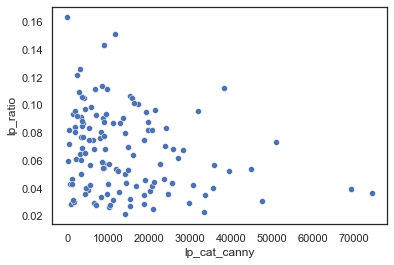

In [49]:
sns.scatterplot(x='lp_cat_canny',y='lp_ratio',data=result);

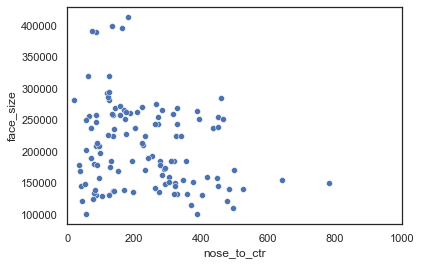

In [65]:
sns.scatterplot(x='nose_to_ctr',y='face_size',data=result);
plt.xlim([0,max(result.nose_to_ctr)-100]);

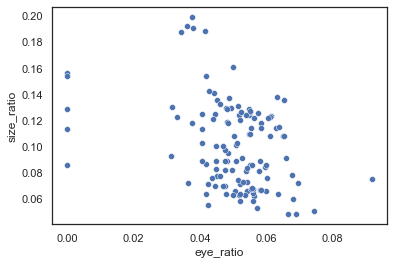

In [55]:
sns.scatterplot(x='eye_ratio',y='size_ratio',data=result);

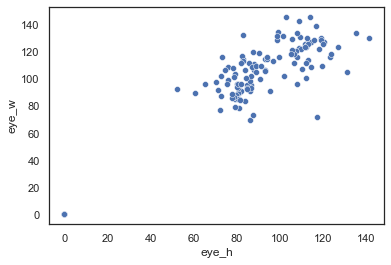

In [60]:
sns.scatterplot(x='eye_h',y='eye_w',data=result);

In [181]:
c = alt.Chart(result).mark_point().encode(
    x=alt.X('eye_h',axis=alt.Axis(labels=False)), y=alt.Y('eye_w',axis=alt.Axis(labels=False)), size='lp_cat_canny', color='EYE_count',
    tooltip=['frame_name',]).properties(width=700, height=250
)
c

alt.Chart(...)

In [282]:
from altair import *

result['new_eye_h'] = result['eye_h']/result['face_size']
result['new_eye_w'] = result['eye_w']/result['face_size']
print(np.mean(result['new_eye_w']))
result_sort = result[['frame_name','new_eye_w','new_eye_h','lp_cat_canny','EYE_count']].sort_values('new_eye_h').iloc[20:-5]
result_sort.columns = ['Frame Name','Eye Width','Eye Height','Face Sharpness','Number of eyes detected']


c = alt.Chart(result_sort).mark_circle(opacity=.8).encode(
    x=alt.X('Eye Height',axis=alt.Axis(labels=False),
            scale=Scale(domain=[np.mean(result['new_eye_h'])/2, 1.5*np.mean(result['new_eye_h'])])
           ),
    y=alt.Y('Eye Width',axis=alt.Axis(labels=False)),
    size='Face Sharpness',
#     color='Number of eyes detected',
#     color = alt.Color('Number of eyes detected',
#                       scale=alt.Scale(scheme = 'set2')
    color = alt.Color('Number of eyes detected',
                      scale=alt.Scale(range=['#647FC7','#C7648E',])
                     ),
    tooltip=['Frame Name',]).properties(width=700, height=250
)
c

0.0005128448159119239


alt.Chart(...)

In [283]:
result = pd.read_csv('./data/df_predict.csv').iloc[:,1:].sort_values('frame_name').reset_index(drop=True)
result['EYE_count']=[str(x) for x in result.num_eye.tolist()]

result['new_eye_h'] = result['eye_h']/result['face_size']
result['new_eye_w'] = result['eye_w']/result['face_size']


# First plot
result_sort = result[['frame_name','new_eye_w','new_eye_h','lp_cat_canny','EYE_count']].sort_values('new_eye_h').iloc[20:-5]
result_sort.columns = ['Frame Name','Eye Width','Eye Height','Face Sharpness','Number of eyes detected']

c = alt.Chart(result_sort).mark_circle(opacity=.8).encode(
    x=alt.X('Eye Height',axis=alt.Axis(labels=False),
            scale=Scale(domain=[np.mean(result['new_eye_h'])/2, 1.5*np.mean(result['new_eye_h'])])
        ),
    y=alt.Y('Eye Width',axis=alt.Axis(labels=False)),
    size='Face Sharpness',
#     color='Number of eyes detected',
#     color = alt.Color('Number of eyes detected',
#                       scale=alt.Scale(scheme = 'set2')
    color = alt.Color('Number of eyes detected',
                    scale=alt.Scale(range=['#647FC7','#C7648E',])
                    ),
    tooltip=['Frame Name',]).properties(width=700, height=250
)

c

alt.Chart(...)

In [284]:


# Second plot
MAX = max(result.face_size)
MIN = min(result.face_size)
section = (max(result.face_size)-min(result.face_size))//3

FACE_SIZE = []
for x in result.face_size.tolist():
    if x<MIN+section:
        FACE_SIZE.append('small')
    elif MIN+section < x < MIN + 2*section:
        FACE_SIZE.append('medium')
    else:
        FACE_SIZE.append('large')

result['Face size'] = FACE_SIZE

result_middle_all = result.sort_values('new_eye_h').iloc[20:-10]
result_middle = result_middle_all[['lp_cat_canny','lp_ratio','Face size']]
result_middle.columns = ['Cat face sharpness','Sharpness ratio (cat:whole frame)','Face size']


points = alt.Chart(result_middle).mark_circle(size=200).encode(
    alt.X('Cat face sharpness'),
    alt.Y('Sharpness ratio (cat:whole frame)'),
#     color='FACE_SIZE',
    color = alt.Color('Face size',
                    scale=alt.Scale(range=['#8C85D9', '#64C7B1', '#D5ABCA',])),
)

top_hist = alt.Chart(result_middle).mark_area(
    opacity=.5, interpolate='step'
).encode(
    alt.X('Cat face sharpness:Q', 
        bin=alt.Bin(maxbins=20), 
        stack=None, 

        ),
    alt.Y('count(*):Q', 
        stack=None, 
        ),
    alt.Color('Face size:N'),
).properties(height=60)

right_hist = alt.Chart(result_middle).mark_area(
    opacity=.5, interpolate='step'
).encode(
    alt.Y('Sharpness ratio (cat:whole frame):Q', 
        bin=alt.Bin(maxbins=20), 
        stack=None,
        ),
    alt.X('count(*):Q', 
        stack=None, 
        ),
    alt.Color('Face size:N'),
).properties(width=60)

chart = top_hist & (points | right_hist)

chart

alt.VConcatChart(...)

In [218]:
result.head(3)

,frame_name,lp_cat,lp_all,lp_ratio,lp_cat_canny,lp_all_canny,lp_ratio_canny,blur,cat_x,cat_y,face_size,size_ratio,eyes,ears,nose,img_ctr,num_eye,num_ear,num_nose,eye_x1,eye_y1,eye_x2,eye_y2,eye_w1,eye_w2,eye_w,eye_h1,eye_h2,eye_h,eye_size,eye_ratio,nose_x,nose_y,ear_w1,ear_w2,ear_w,ear_h1,ear_h2,ear_h,video,avg_face,nose_to_ctr,avg_to_ctr,prob,face_frame_ctr,EYE_count,new_eye_h,new_eye_w
0,IMG_0395.MOV_11.jpg,1.886157,58.200515,0.032408,40128.709087,18828.055094,2.131325,0,0.546875,0.193519,128881.000000,0.062153,"[(1102, 306, 102, 75), (1273, 318, 118, 72)]","[[1010, 41, 175, 182], [1354, 38, 202, 198]]","[[1178, 434, 94, 60]]","(960.0, 540.0)",2,2,1,1102,306,1273,318,102,118,110.0,75,72,73.5,8085.00,0.062732,1178,434,175,202,188.5,182,198,190.0,IMG_0395,253424.287037,242.404620,354.444951,0.525,1559.50,2,0.000570,0.000854
1,IMG_0395.MOV_14.jpg,1.958144,40.783653,0.048013,14070.580862,13296.257781,1.058236,0,0.545833,0.175000,148225.000000,0.071482,"[(1112, 299, 100, 82), (1278, 319, 113, 71)]","[[1018, 36, 171, 183], [1367, 33, 197, 202]]","[[1186, 429, 88, 60]]","(960.0, 540.0)",2,2,1,1112,299,1278,319,100,113,106.5,82,71,76.5,8147.25,0.054965,1186,429,171,197,184.0,183,202,192.5,IMG_0395,253424.287037,251.787609,354.444951,0.450,1563.00,2,0.000516,0.000719
2,IMG_0395.MOV_140.jpg,0.622981,38.946426,0.015996,0.000000,9230.690060,0.000000,1,0.661458,0.384259,253424.287037,0.001622,"[(1087, 411, 86, 72)]","[[976, 1, 209, 230], [1361, 58, 203, 233]]",[],"(960.0, 540.0)",1,2,0,1087,411,0,0,86,0,86.0,72,0,72.0,6192.00,1.840666,0,0,209,203,206.0,230,233,231.5,IMG_0395,253424.287037,1101.453585,354.444951,0.260,645.25,1,0.000284,0.000339


In [261]:
MAX = max(result.face_size)
MIN = min(result.face_size)
section = (max(result.face_size)-min(result.face_size))//3
['small' for x in result.face_size.tolist() if x<MIN+section ]

FACE_SIZE = []
for x in result.face_size.tolist():
    if x<MIN+section:
        FACE_SIZE.append('small')
    elif MIN+section < x < MIN + 2*section:
        FACE_SIZE.append('medium')
    else:
        FACE_SIZE.append('large')

result['FACE_SIZE'] = FACE_SIZE

result_middle = result.sort_values('new_eye_h').iloc[20:-10]
# vega.scheme('basic', ['#f00', '#0f0', '#00f', '#ff0', '#f0f', '#0ff']);


points = alt.Chart(result_middle).mark_circle(size=120).encode(
    alt.X('lp_cat_canny'),
    alt.Y('lp_ratio'),
#     color='FACE_SIZE',
    color = alt.Color('FACE_SIZE',
                      scale=alt.Scale(range=['#A2E098', '#8C85D9', '#FFC300',])),
)

top_hist = alt.Chart(result_middle).mark_area(
    opacity=.4, interpolate='step'
).encode(
    alt.X('lp_cat_canny:Q', 
          bin=alt.Bin(maxbins=20), 
          stack=None, 
          
         ),
    alt.Y('count(*):Q', 
          stack=None, 
         ),
    alt.Color('FACE_SIZE:N'),
).properties(height=60)

right_hist = alt.Chart(result_middle).mark_area(
    opacity=.4, interpolate='step'
).encode(
    alt.Y('lp_ratio:Q', 
          bin=alt.Bin(maxbins=20), 
          stack=None,
         ),
    alt.X('count(*):Q', 
          stack=None, 
         ),
    alt.Color('FACE_SIZE:N'),
).properties(width=60)

chart = top_hist & (points | right_hist)

chart

alt.VConcatChart(...)

In [214]:
import altair as alt
from vega_datasets import data

iris = data.iris()

xrange = (3, 9)
yrange = (1, 6)

points = alt.Chart(iris).mark_circle().encode(
    alt.X('sepalLength', scale=alt.Scale(domain=xrange)),
    alt.Y('sepalWidth', scale=alt.Scale(domain=yrange)),
    color='species',
)

top_hist = alt.Chart(iris).mark_area(
    opacity=.4, interpolate='step'
).encode(
    alt.X('sepalLength:Q', 
          bin=alt.Bin(maxbins=20, extent=xrange), 
          stack=None, 
          scale=alt.Scale(domain=xrange),
         ),
    alt.Y('count(*):Q', 
          stack=None, 
         ),
    alt.Color('species:N'),
).properties(height=60)

right_hist = alt.Chart(iris).mark_area(
    opacity=.4, interpolate='step'
).encode(
    alt.Y('sepalWidth:Q', 
          bin=alt.Bin(maxbins=20, extent=yrange), 
          stack=None,
          scale=alt.Scale(domain=yrange),
         ),
    alt.X('count(*):Q', 
          stack=None, 
         ),
    alt.Color('species:N'),
).properties(width=60)

chart = top_hist & (points | right_hist)

chart

alt.VConcatChart(...)

In [186]:

# Python3 program to illustrate
# How to select color schemes
# for scatter plot coloring
# using altair
  
# Importing altair and vega_datasets library
import altair as alt
from vega_datasets import data
  
# Selecting the cars dataset
cars = data.cars()
  
# Making the Scatter Plot
alt.Chart(cars).mark_point().encode(
    
    # Map Miles_per_Gallon to x-axis
    x='Miles_per_Gallon',
      
    # Map the Horsepower to y-axis
    y='Horsepower',
      
    # Coloring the Scatter Plot
    # using Origin variable and
    # color scheme
    color = alt.Color('Origin', scale=alt.
                      Scale(scheme = 'dark2'))
)

alt.Chart(...)

In [150]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

output_file("toolbar.html")

source = ColumnDataSource(
        data=dict(
            x=[1, 2, 3, 4, 5],
            y=[2, 5, 8, 2, 7],
            desc=['A', 'b', 'C', 'd', 'E'],
            imgs = ['data/'+ x for x in result.frame_name.tolist()]
        )
    )

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs"  alt="@imgs" 
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">Location</span>
                <span style="font-size: 10px; color: #696;">($x, $y)</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=400, plot_height=400, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

In [151]:
np.random.seed(0)

n_objects = 20
n_times = 50

# Create one (x, y) pair of metadata per object
locations = pd.DataFrame({
    'id': range(n_objects),
    'x': np.random.randn(n_objects),
    'y': np.random.randn(n_objects)
})

# Create a 50-element time-series for each object
timeseries = pd.DataFrame(np.random.randn(n_times, n_objects).cumsum(0),
                          columns=locations['id'],
                          index=pd.RangeIndex(0, n_times, name='time'))

# Melt the wide-form timeseries into a long-form view
timeseries = timeseries.reset_index().melt('time')

# Merge the (x, y) metadata into the long-form view
timeseries['id'] = timeseries['id'].astype(int)  # make merge not complain
data = pd.merge(timeseries, locations, on='id')

# Data is prepared, now make a chart

selector = alt.selection_single(empty='all', fields=['id'])

base = alt.Chart(data).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x='mean(x)',
    y='mean(y)',
    color=alt.condition(selector, 'id:O', alt.value('lightgray'), legend=None),
)

timeseries = base.mark_line().encode(
    x='time',
    y=alt.Y('value', scale=alt.Scale(domain=(-15, 15))),
    color=alt.Color('id:O', legend=None)
).transform_filter(
    selector
)

points | timeseries

alt.HConcatChart(...)

In [152]:
locations.head()

,id,x,y
0,0,1.764052,-2.552990
1,1,0.400157,0.653619
2,2,0.978738,0.864436
3,3,2.240893,-0.742165
4,4,1.867558,2.269755


In [156]:
timeseries = pd.DataFrame(np.random.randn(n_times, n_objects).cumsum(0),
                          columns=locations['id'],
                          index=pd.RangeIndex(0, n_times, name='time'))
# timeseries

In [157]:
data

,time,id,value,x,y
0,0,0,-1.048553,1.764052,-2.552990
1,1,0,-1.721013,1.764052,-2.552990
2,2,0,-2.886163,1.764052,-2.552990
3,3,0,-1.003013,1.764052,-2.552990
4,4,0,-0.626587,1.764052,-2.552990
...,...,...,...,...,...
995,45,19,4.995484,-0.854096,-0.302303
996,46,19,4.613459,-0.854096,-0.302303
997,47,19,4.255345,-0.854096,-0.302303
998,48,19,4.352564,-0.854096,-0.302303


In [166]:
points = base.mark_point(filled=True, size=200).encode(
    x='mean(x)',
    y='mean(y)',
    color='id'
#     alt.condition(selector, 'id:O', alt.value('lightgray'), legend=None),
)
points

alt.Chart(...)

In [160]:
timeseries = base.mark_line().encode(
    x='time',
    y=alt.Y('value', scale=alt.Scale(domain=(-15, 15))),
    color=alt.Color('id:O', legend=None)
).transform_filter(
    selector
)
timeseries

alt.Chart(...)

In [165]:
# import altair as alt
# import pandas as pd
# from sklearn.datasets import fetch_lfw_people
# faces = fetch_lfw_people(min_faces_per_person=60)

# data = pd.DataFrame({
#     'image': list(faces.images[:12])  # list of 2D arrays
# })

# alt.Chart(data).transform_window(
#     index='count()'           # number each of the images
# ).transform_flatten(
#     ['image']                 # extract rows from each image
# ).transform_window(
#     row='count()',            # number the rows...
#     groupby=['index']         # ...within each image
# ).transform_flatten(
#     ['image']                 # extract the values from each row
# ).transform_window(
#     column='count()',         # number the columns...
#     groupby=['index', 'row']  # ...within each row & image
# ).mark_rect().encode(
#     alt.X('column:O', axis=None),
#     alt.Y('row:O', axis=None),
#     alt.Color('image:Q',
#         scale=alt.Scale(scheme=alt.SchemeParams('greys', extent=[1, 0])),
#         legend=None
#     ),
#     alt.Facet('index:N', columns=4)
# ).properties(
#     width=100,
#     height=120
# )

In [164]:
import pandas as pd
from IPython.core.display import display,HTML

df = pd.DataFrame([['A231', 'Book', 5, 3, 150], 
                   ['M441', 'Magic Staff', 10, 7, 200]],
                   columns = ['Code', 'Name', 'Price', 'Net', 'Sales'])

# your images
images = ['https://vignette.wikia.nocookie.net/2007scape/images/7/7a/Mage%27s_book_detail.png/revision/latest?cb=20180310083825',
          'https://i.pinimg.com/originals/d9/5c/9b/d95c9ba809aa9dd4cb519a225af40f2b.png'] 
images = ['data/'+ x for x in result.frame_name.tolist()][:2]


df['image'] = images

# convert your links to html tags 
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', None)

display(HTML(df.to_html(escape=False ,formatters=dict(image=path_to_image_html))))

,Code,Name,Price,Net,Sales,image
0,A231,Book,5,3,150,
1,M441,Magic Staff,10,7,200,
